In [ ]:
#Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from PlotNonLinear import plotDecBoundaries_Nonlinear

# New Section

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/559/dataset/hw5_train.csv",header=None)
df2 = pd.read_csv("/content/drive/MyDrive/559/dataset/hw5_test.csv",header=None)

In [ ]:
df1.head()

,0,1,2
0,4.588312,-2.052164,0.0
1,4.273334,4.999063,0.0
2,6.299099,1.306748,1.0
3,2.569094,-1.427852,0.0
4,1.994091,-5.291644,0.0


In [ ]:
array1=df1.to_numpy()
array2=df2.to_numpy()

In [ ]:
trainx = array1[:,:2]
trainy = array1[:,2]
testx = array2[:,:2]
testy = array2[:,2]


In [ ]:
for i in range(trainy.shape[0]):
  if(trainy[i]==0):
    trainy[i] = -1

for i in range(testy.shape[0]):
  if(testy[i]==0):
    testy[i] = -1

In [ ]:
trainy

array([-1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,
        1., -1.,  1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,
       -1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,
       -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,
       -1.,  1.,  1.,  1., -1., -1.,  1., -1.])

In [ ]:
def class_predictor(arr):
  pred= linear_regression.predict(arr)
  for j in range(pred.shape[0]):
    if(pred[j] <=0):
      pred[j] = -1
    else:
      pred[j] = 1
  return pred

def accuracy(x,y):
  acc=0
  inc =0
  for k,l in zip(x,y):
    if(k==l):
      acc+=1
    else:
      inc+=1
  return acc/len(x)

def criterion(y,y_hat):
  s =0
  for i,j in zip(y,y_hat):
    s += (i-j)**2
  return 1*s/len(y)



lamda= 0 

Polynomial Degree = 1, Accuracy Test = 77.0%, Accuracy Train = 80.0%


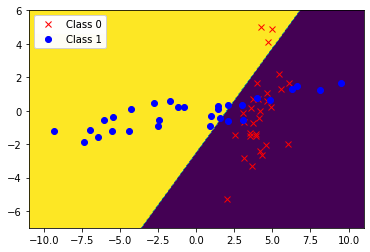

Polynomial Degree = 2, Accuracy Test = 84.5%, Accuracy Train = 88.33333333333333%


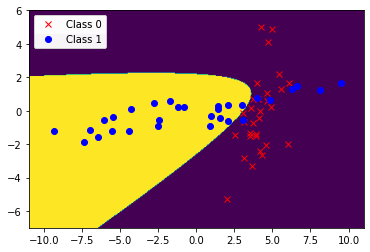

Polynomial Degree = 3, Accuracy Test = 83.5%, Accuracy Train = 88.33333333333333%
Polynomial Degree = 4, Accuracy Test = 81.5%, Accuracy Train = 90.0%


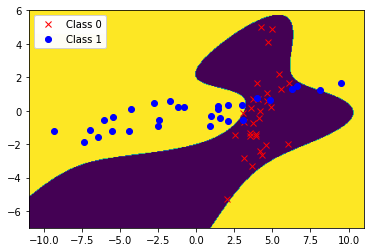

Polynomial Degree = 5, Accuracy Test = 80.0%, Accuracy Train = 90.0%
Polynomial Degree = 6, Accuracy Test = 79.5%, Accuracy Train = 95.0%
Polynomial Degree = 7, Accuracy Test = 71.5%, Accuracy Train = 95.0%


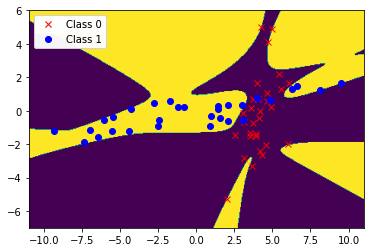

In [ ]:
linear_regression = LinearRegression(fit_intercept=False)
test_acc_list_0 = []
train_acc_list = []
criterion_list = []
for i in range(1,8):
  poly_transformation = PolynomialFeatures(i)
  trainx_tf = poly_transformation.fit_transform(trainx)
  testx_tf = poly_transformation.fit_transform(testx)
  linear_regression.fit(trainx_tf, trainy)
  #for Test
  predicted = class_predictor(testx_tf)
  test_acc = accuracy(testy, predicted)
  test_acc_list_0.append(test_acc)
  #for Train
  train_predicted = class_predictor(trainx_tf)
  train_acc = accuracy(trainy, train_predicted)
  train_acc_list.append(train_acc)

  criterion_list.append(criterion(trainy,train_predicted))

  print(f"Polynomial Degree = {i}, Accuracy Test = {test_acc*100}%, Accuracy Train = {train_acc*100}%")

  #plot
  if(i in [1,2,4,7]):
    plotDecBoundaries_Nonlinear(trainx,trainy, poly_transformation.fit_transform,class_predictor,legend_on = True )



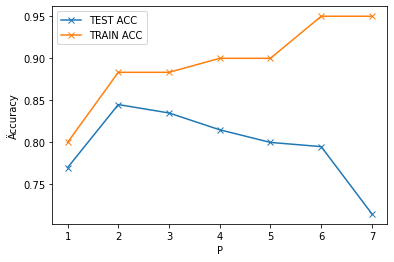

In [ ]:
#for Plotting 
plt.plot(range(1,8), test_acc_list_0, label = "TEST ACC",marker="x")
plt.plot(range(1,8), train_acc_list, label = "TRAIN ACC", marker="x")
plt.legend()
plt.xlabel("P")
plt.ylabel("Äccuracy")
plt.show()

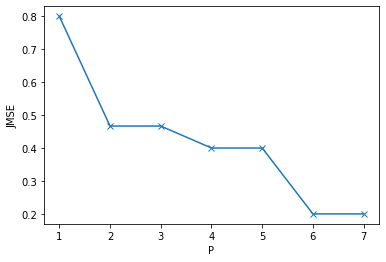

In [ ]:
plt.plot(range(1,8), criterion_list, marker="x")
plt.xlabel("P")
plt.ylabel("JMSE")
plt.show()

lamda = 0,3

Polynomial Degree = 1, Accuracy Test = 77.0%, Accuracy Train = 80.0


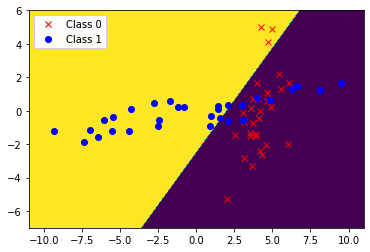

Polynomial Degree = 2, Accuracy Test = 85.0%, Accuracy Train = 88.33333333333333


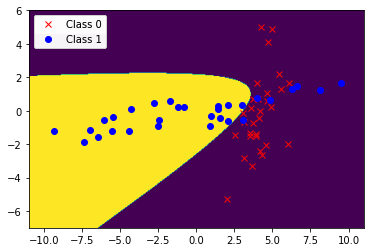

Polynomial Degree = 3, Accuracy Test = 83.5%, Accuracy Train = 88.33333333333333
Polynomial Degree = 4, Accuracy Test = 82.5%, Accuracy Train = 91.66666666666666


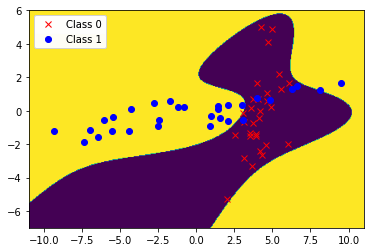

Polynomial Degree = 5, Accuracy Test = 80.5%, Accuracy Train = 90.0
Polynomial Degree = 6, Accuracy Test = 82.5%, Accuracy Train = 95.0
Polynomial Degree = 7, Accuracy Test = 75.0%, Accuracy Train = 95.0


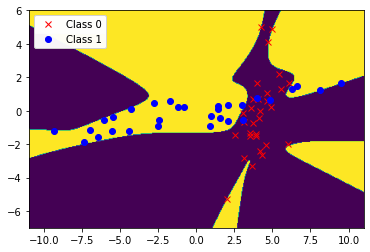

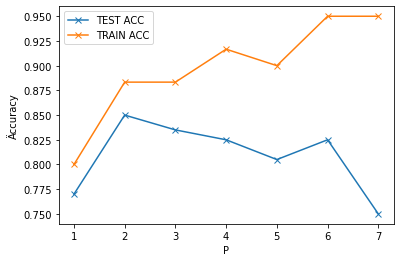

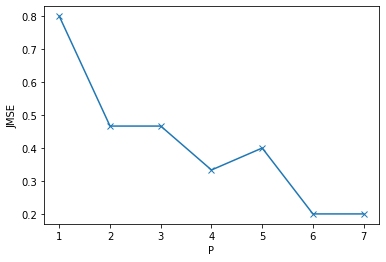

In [ ]:
#lambda = 0.3
linear_regression = Ridge(fit_intercept=False, alpha = 0.3)
test_acc_list_03 = []
train_acc_list = []
criterion_list = []
for i in range(1,8):
  poly_transformation = PolynomialFeatures(i)
  trainx_tf = poly_transformation.fit_transform(trainx)
  testx_tf = poly_transformation.fit_transform(testx)
  linear_regression.fit(trainx_tf, trainy)
  #for Test
  predicted = class_predictor(testx_tf)
  test_acc = accuracy(testy, predicted)
  test_acc_list_03.append(test_acc)
  #for Train
  train_predicted = class_predictor(trainx_tf)
  train_acc = accuracy(trainy, train_predicted)
  train_acc_list.append(train_acc)

  criterion_list.append(criterion(trainy,train_predicted))

  print(f"Polynomial Degree = {i}, Accuracy Test = {test_acc*100}%, Accuracy Train = {train_acc*100}")

  #plot
  if(i in [1,2,4,7]):
    plotDecBoundaries_Nonlinear(trainx,trainy, poly_transformation.fit_transform,class_predictor,legend_on = True )


#for Plotting 
plt.plot(range(1,8), test_acc_list_03, label = "TEST ACC",marker="x")
plt.plot(range(1,8), train_acc_list, label = "TRAIN ACC", marker="x")
plt.legend()
plt.xlabel("P")
plt.ylabel("Äccuracy")
plt.show()


plt.plot(range(1,8), criterion_list, marker="x")
plt.xlabel("P")
plt.ylabel("JMSE")
plt.show()

lamda =1

Polynomial Degree = 1, Accuracy Test = 78.0%, Accuracy Train = 80.0%


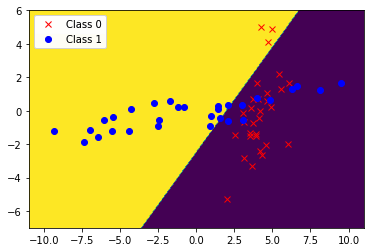

Polynomial Degree = 2, Accuracy Test = 85.0%, Accuracy Train = 88.33333333333333%


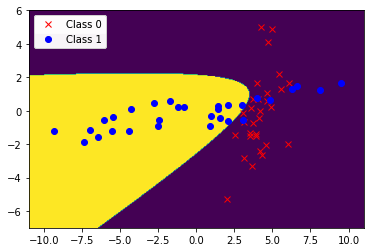

Polynomial Degree = 3, Accuracy Test = 83.0%, Accuracy Train = 88.33333333333333%
Polynomial Degree = 4, Accuracy Test = 82.5%, Accuracy Train = 91.66666666666666%


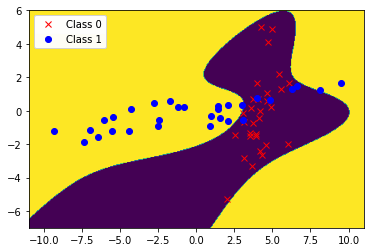

Polynomial Degree = 5, Accuracy Test = 82.0%, Accuracy Train = 90.0%
Polynomial Degree = 6, Accuracy Test = 80.5%, Accuracy Train = 95.0%
Polynomial Degree = 7, Accuracy Test = 76.0%, Accuracy Train = 95.0%


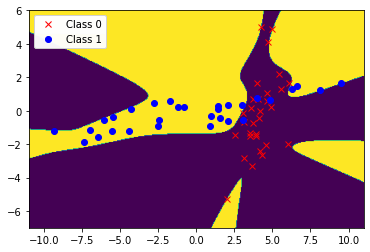

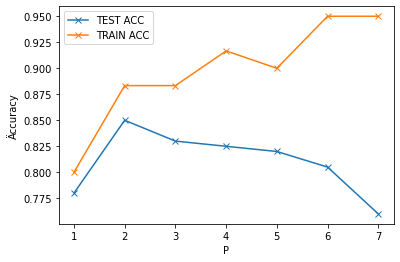

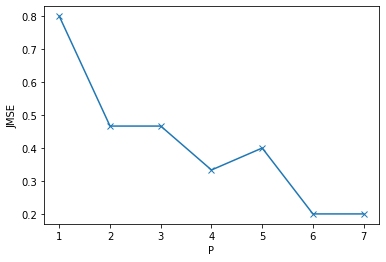

In [ ]:
linear_regression = Ridge(fit_intercept=False, alpha = 1)
test_acc_list_1 = []
train_acc_list = []
criterion_list = []
for i in range(1,8):
  poly_transformation = PolynomialFeatures(i)
  trainx_tf = poly_transformation.fit_transform(trainx)
  testx_tf = poly_transformation.fit_transform(testx)
  linear_regression.fit(trainx_tf, trainy)
  #for Test
  predicted = class_predictor(testx_tf)
  test_acc = accuracy(testy, predicted)
  test_acc_list_1.append(test_acc)
  #for Train
  train_predicted = class_predictor(trainx_tf)
  train_acc = accuracy(trainy, train_predicted)
  train_acc_list.append(train_acc)

  criterion_list.append(criterion(trainy,train_predicted))

  print(f"Polynomial Degree = {i}, Accuracy Test = {test_acc*100}%, Accuracy Train = {train_acc*100}%")

  #plot
  if(i in [1,2,4,7]):
    plotDecBoundaries_Nonlinear(trainx,trainy, poly_transformation.fit_transform,class_predictor,legend_on = True )


#for Plotting 
plt.plot(range(1,8), test_acc_list_1, label = "TEST ACC",marker="x")
plt.plot(range(1,8), train_acc_list, label = "TRAIN ACC", marker="x")
plt.legend()
plt.xlabel("P")
plt.ylabel("Äccuracy")
plt.show()


plt.plot(range(1,8), criterion_list, marker="x")
plt.xlabel("P")
plt.ylabel("JMSE")
plt.show()

lamda = 3

Polynomial Degree = 1, Accuracy Test = 78.0% Accuracy Train = 80.0%


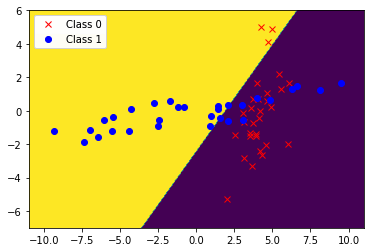

Polynomial Degree = 2, Accuracy Test = 84.5% Accuracy Train = 88.33333333333333%


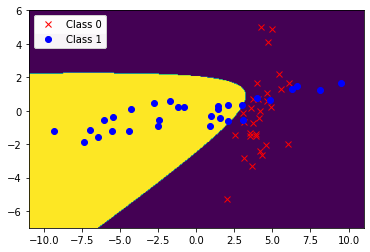

Polynomial Degree = 3, Accuracy Test = 83.0% Accuracy Train = 88.33333333333333%
Polynomial Degree = 4, Accuracy Test = 83.5% Accuracy Train = 90.0%


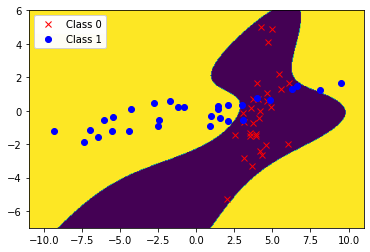

Polynomial Degree = 5, Accuracy Test = 81.0% Accuracy Train = 90.0%
Polynomial Degree = 6, Accuracy Test = 80.0% Accuracy Train = 93.33333333333333%
Polynomial Degree = 7, Accuracy Test = 78.0% Accuracy Train = 95.0%


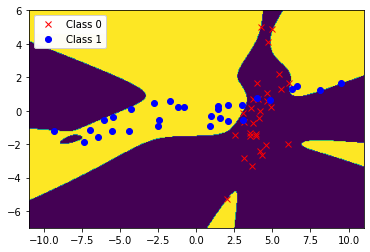

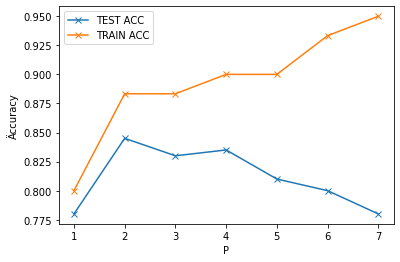

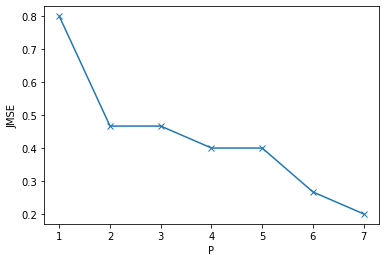

In [ ]:

linear_regression = Ridge(fit_intercept=False, alpha = 3)
test_acc_list_3 = []
train_acc_list = []
criterion_list = []
for i in range(1,8):
  poly_transformation = PolynomialFeatures(i)
  trainx_tf = poly_transformation.fit_transform(trainx)
  testx_tf = poly_transformation.fit_transform(testx)
  linear_regression.fit(trainx_tf, trainy)
  #for Test
  predicted = class_predictor(testx_tf)
  test_acc = accuracy(testy, predicted)
  test_acc_list_3.append(test_acc)
  #for Train
  train_predicted = class_predictor(trainx_tf)
  train_acc = accuracy(trainy, train_predicted)
  train_acc_list.append(train_acc)

  criterion_list.append(criterion(trainy,train_predicted))

  print(f"Polynomial Degree = {i}, Accuracy Test = {test_acc*100}% Accuracy Train = {train_acc*100}%")

  #plot
  if(i in [1,2,4,7]):
    plotDecBoundaries_Nonlinear(trainx,trainy, poly_transformation.fit_transform,class_predictor,legend_on = True )


#for Plotting 
plt.plot(range(1,8), test_acc_list_3, label = "TEST ACC",marker="x")
plt.plot(range(1,8), train_acc_list, label = "TRAIN ACC", marker="x")
plt.legend()
plt.xlabel("P")
plt.ylabel("Äccuracy")
plt.show()


plt.plot(range(1,8), criterion_list, marker="x")
plt.xlabel("P")
plt.ylabel("JMSE")
plt.show()

lamda =10

Polynomial Degree = 1, Accuracy Test = 79.0% Accuracy Train = 76.66666666666667%


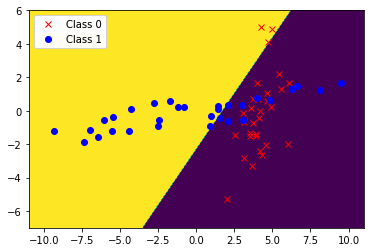

Polynomial Degree = 2, Accuracy Test = 82.5% Accuracy Train = 85.0%


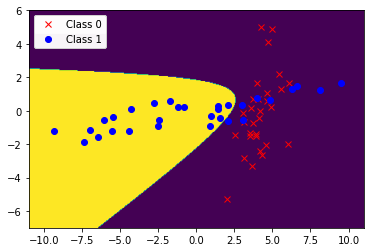

Polynomial Degree = 3, Accuracy Test = 81.0% Accuracy Train = 85.0%
Polynomial Degree = 4, Accuracy Test = 83.0% Accuracy Train = 88.33333333333333%


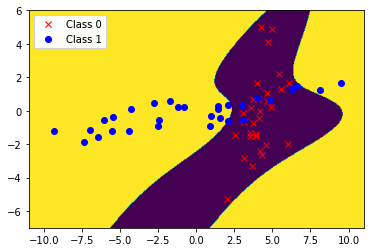

Polynomial Degree = 5, Accuracy Test = 81.0% Accuracy Train = 90.0%
Polynomial Degree = 6, Accuracy Test = 79.0% Accuracy Train = 93.33333333333333%
Polynomial Degree = 7, Accuracy Test = 82.0% Accuracy Train = 95.0%


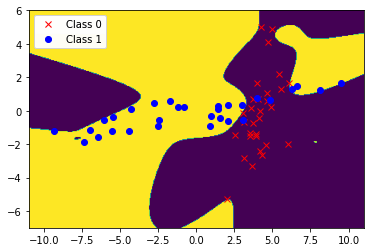

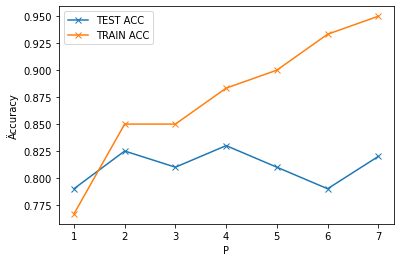

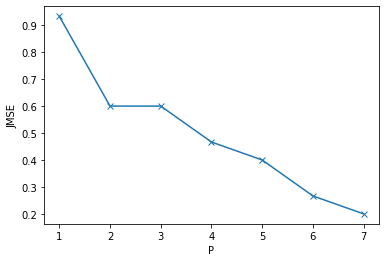

In [ ]:
linear_regression = Ridge(fit_intercept=False, alpha = 10)
test_acc_list_10 = []
train_acc_list = []
criterion_list = []
for i in range(1,8):
  poly_transformation = PolynomialFeatures(i)
  trainx_tf = poly_transformation.fit_transform(trainx)
  testx_tf = poly_transformation.fit_transform(testx)
  linear_regression.fit(trainx_tf, trainy)
  #for Test
  predicted = class_predictor(testx_tf)
  test_acc = accuracy(testy, predicted)
  test_acc_list_10.append(test_acc)
  #for Train
  train_predicted = class_predictor(trainx_tf)
  train_acc = accuracy(trainy, train_predicted)
  train_acc_list.append(train_acc)

  criterion_list.append(criterion(trainy,train_predicted))

  print(f"Polynomial Degree = {i}, Accuracy Test = {test_acc*100}% Accuracy Train = {train_acc*100}%")

  #plot
  if(i in [1,2,4,7]):
    plotDecBoundaries_Nonlinear(trainx,trainy, poly_transformation.fit_transform,class_predictor,legend_on = True )


#for Plotting 
plt.plot(range(1,8), test_acc_list_10, label = "TEST ACC",marker="x")
plt.plot(range(1,8), train_acc_list, label = "TRAIN ACC", marker="x")
plt.legend()
plt.xlabel("P")
plt.ylabel("Äccuracy")
plt.show()


plt.plot(range(1,8), criterion_list, marker="x")
plt.xlabel("P")
plt.ylabel("JMSE")
plt.show()

lamda =30

Polynomial Degree = 1, Accuracy Test = 80.0% Accuracy Train = 76.66666666666667%


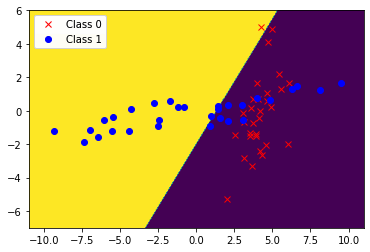

Polynomial Degree = 2, Accuracy Test = 80.0% Accuracy Train = 80.0%


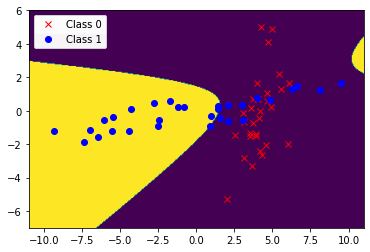

Polynomial Degree = 3, Accuracy Test = 79.0% Accuracy Train = 81.66666666666667%
Polynomial Degree = 4, Accuracy Test = 81.5% Accuracy Train = 83.33333333333334%


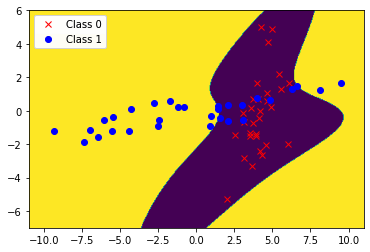

Polynomial Degree = 5, Accuracy Test = 79.5% Accuracy Train = 86.66666666666667%
Polynomial Degree = 6, Accuracy Test = 77.5% Accuracy Train = 91.66666666666666%
Polynomial Degree = 7, Accuracy Test = 81.5% Accuracy Train = 95.0%


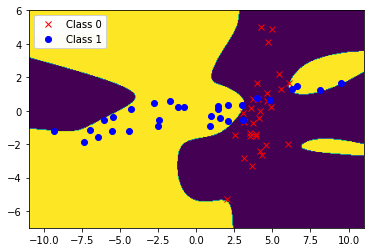

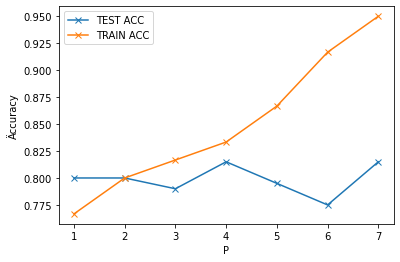

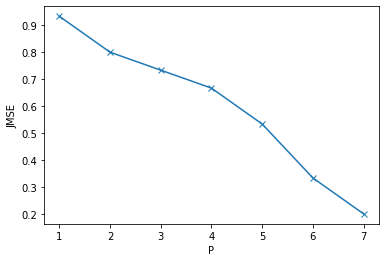

In [ ]:

linear_regression = Ridge(fit_intercept=False, alpha = 30)
test_acc_list_30 = []
train_acc_list = []
criterion_list = []
for i in range(1,8):
  poly_transformation = PolynomialFeatures(i)
  trainx_tf = poly_transformation.fit_transform(trainx)
  testx_tf = poly_transformation.fit_transform(testx)
  linear_regression.fit(trainx_tf, trainy)
  #for Test
  predicted = class_predictor(testx_tf)
  test_acc = accuracy(testy, predicted)
  test_acc_list_30.append(test_acc)
  #for Train
  train_predicted = class_predictor(trainx_tf)
  train_acc = accuracy(trainy, train_predicted)
  train_acc_list.append(train_acc)

  criterion_list.append(criterion(trainy,train_predicted))

  print(f"Polynomial Degree = {i}, Accuracy Test = {test_acc*100}% Accuracy Train = {train_acc*100}%")

  #plot
  if(i in [1,2,4,7]):
    plotDecBoundaries_Nonlinear(trainx,trainy, poly_transformation.fit_transform,class_predictor,legend_on = True )


#for Plotting 
plt.plot(range(1,8), test_acc_list_30, label = "TEST ACC",marker="x")
plt.plot(range(1,8), train_acc_list, label = "TRAIN ACC", marker="x")
plt.legend()
plt.xlabel("P")
plt.ylabel("Äccuracy")
plt.show()


plt.plot(range(1,8), criterion_list, marker="x")
plt.xlabel("P")
plt.ylabel("JMSE")
plt.show()

lamda = 100

Polynomial Degree = 1, Accuracy Test = 76.5% Accuracy Train = 75.0%


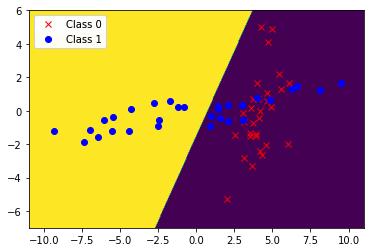

Polynomial Degree = 2, Accuracy Test = 76.5% Accuracy Train = 76.66666666666667%


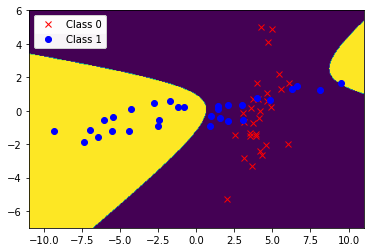

Polynomial Degree = 3, Accuracy Test = 78.5% Accuracy Train = 80.0%
Polynomial Degree = 4, Accuracy Test = 77.5% Accuracy Train = 80.0%


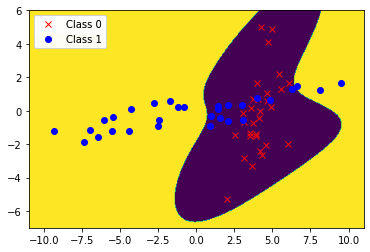

Polynomial Degree = 5, Accuracy Test = 76.5% Accuracy Train = 80.0%
Polynomial Degree = 6, Accuracy Test = 75.0% Accuracy Train = 86.66666666666667%
Polynomial Degree = 7, Accuracy Test = 82.5% Accuracy Train = 93.33333333333333%


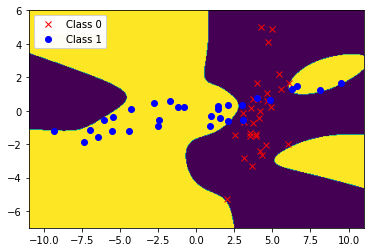

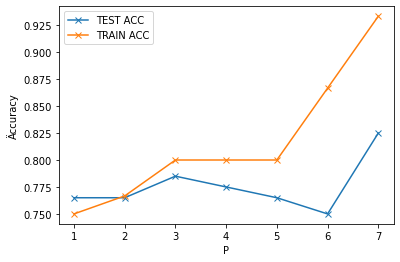

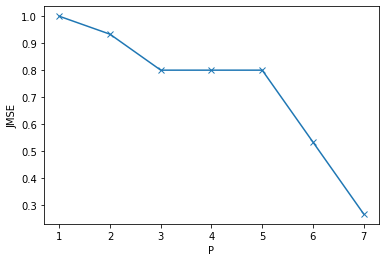

In [ ]:

linear_regression = Ridge(fit_intercept=False, alpha = 100)
test_acc_list_100 = []
train_acc_list = []
criterion_list = []
for i in range(1,8):
  poly_transformation = PolynomialFeatures(i)
  trainx_tf = poly_transformation.fit_transform(trainx)
  testx_tf = poly_transformation.fit_transform(testx)
  linear_regression.fit(trainx_tf, trainy)
  #for Test
  predicted = class_predictor(testx_tf)
  test_acc = accuracy(testy, predicted)
  test_acc_list_100.append(test_acc)
  #for Train
  train_predicted = class_predictor(trainx_tf)
  train_acc = accuracy(trainy, train_predicted)
  train_acc_list.append(train_acc)

  criterion_list.append(criterion(trainy,train_predicted))

  print(f"Polynomial Degree = {i}, Accuracy Test = {test_acc*100}% Accuracy Train = {train_acc*100}%")

  #plot
  if(i in [1,2,4,7]):
    plotDecBoundaries_Nonlinear(trainx,trainy, poly_transformation.fit_transform,class_predictor,legend_on = True )


#for Plotting 
plt.plot(range(1,8), test_acc_list_100, label = "TEST ACC",marker="x")
plt.plot(range(1,8), train_acc_list, label = "TRAIN ACC", marker="x")
plt.legend()
plt.xlabel("P")
plt.ylabel("Äccuracy")
plt.show()


plt.plot(range(1,8), criterion_list, marker="x")
plt.xlabel("P")
plt.ylabel("JMSE")
plt.show()

In [ ]:
def acc_list(a_list):
  coreect_list = []
  for i in range(len(a_list)):
    if(i==0 or i==1 or i==3 or i==6):
      coreect_list.append(a_list[i])

  return coreect_list

In [ ]:
test_list_0 = acc_list(test_acc_list_0)
test_list_03 = acc_list(test_acc_list_03)
test_list_1 = acc_list(test_acc_list_1)
test_list_3 = acc_list(test_acc_list_3)
test_list_30 = acc_list(test_acc_list_30)
test_list_10 = acc_list(test_acc_list_10)
test_list_100 = acc_list(test_acc_list_100)

In [ ]:
import math
ld = [0.3,1,3,10,30,100]
log_ld = [-1]
for i in ld:
  log_ld.append(math.log10(i))

In [ ]:
p_1 = [test_list_0[0],test_list_03[0],test_list_1[0],test_list_3[0],test_list_10[0],test_list_30[0],test_list_100[0]]
p_2 = [test_list_0[1],test_list_03[1],test_list_1[1],test_list_3[1],test_list_10[1],test_list_30[1],test_list_100[1]]
p_4 = [test_list_0[2],test_list_03[2],test_list_1[2],test_list_3[2],test_list_10[2],test_list_30[2],test_list_100[2]]
p_7 = [test_list_0[3],test_list_03[3],test_list_1[3],test_list_3[3],test_list_10[3],test_list_30[3],test_list_100[3]]

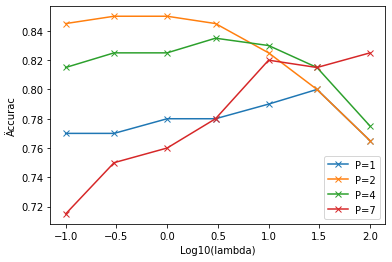

In [ ]:
plt.plot(log_ld, p_1, label="P=1", marker = "x")
plt.plot(log_ld, p_2, label="P=2", marker = "x")
plt.plot(log_ld, p_4, label="P=4", marker = "x")
plt.plot(log_ld, p_7, label="P=7", marker = "x")
plt.xlabel("Log10(lambda)")
plt.ylabel("Äccurac")
plt.legend()